In [63]:
library(cluster)
library(ggplot2)

#leer datos
datos <-read.table("digitos.txt",row.names=1,dec=".",header=TRUE)
etiquetas<-datos$V1
datos[[1]]<- NULL  #eliminar la primera columna
#header=TRUE deberia servir para no leer la primera fila ( los nombres)
summary(datos)


       V2                V3                V4               V5         
 Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.000   Min.   :-1.0000  
 1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:-1.000   1st Qu.:-1.0000  
 Median :-1.0000   Median :-1.0000   Median :-1.000   Median :-1.0000  
 Mean   :-0.9954   Mean   :-0.9596   Mean   :-0.892   Mean   :-0.7753  
 3rd Qu.:-1.0000   3rd Qu.:-1.0000   3rd Qu.:-1.000   3rd Qu.:-0.9610  
 Max.   :-0.2350   Max.   : 0.9740   Max.   : 1.000   Max.   : 1.0000  
       V6                V7                V8                V9         
 Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.0000  
 1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:-0.9567   1st Qu.:-0.5210  
 Median :-1.0000   Median :-0.9180   Median :-0.3045   Median : 0.4060  
 Mean   :-0.6238   Mean   :-0.4324   Mean   :-0.1996   Mean   : 0.1686  
 3rd Qu.:-0.3877   3rd Qu.: 0.1405   3rd Qu.: 0.4890   3rd Qu.: 0.8060  
 Max.   : 1.0000   Max.   : 1.0000   Max.   : 1.0000   Max

In [64]:
#utilizando k-means

k0 <- 4 # di un k0 = 4 ya que son 4 numeros representados
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)

ERROR: Error in plot.new(): figure margins too large


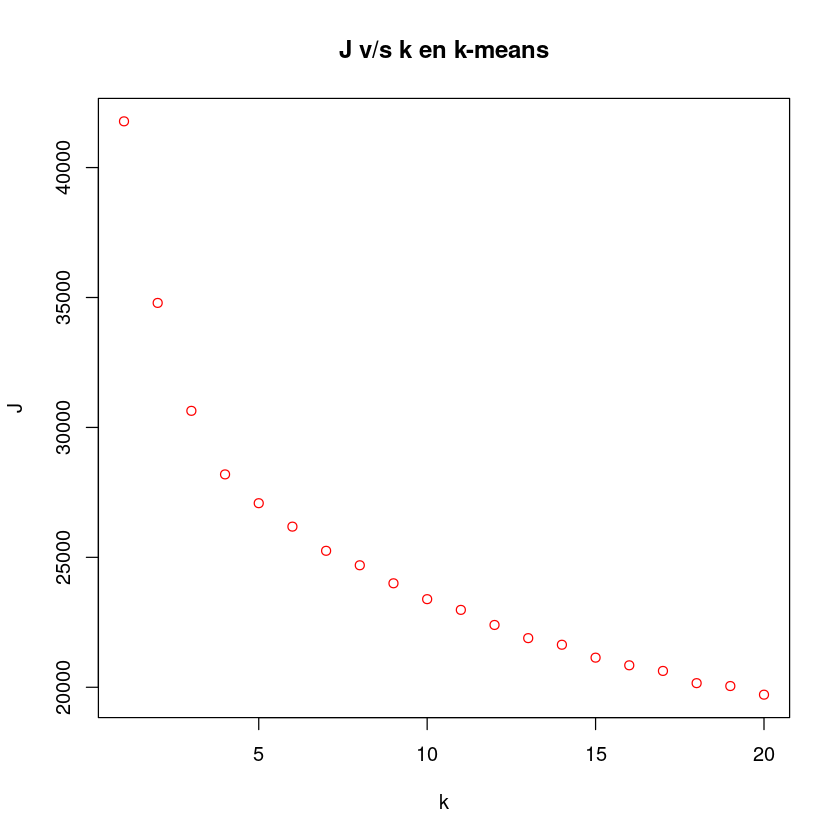

In [65]:
#J vs  k
J<-rep(0,20)
fin_iter<-20

for (k in 1:fin_iter){
    cl<-kmeans(datos,k,iter.max=1000,nstart=10)
    J[k]<-cl$tot.withinss     
}
plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

In [67]:
ClusterPurity <- function(clusters, classes) { #Función para purity
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}

#calcular purity del clasificador k-means en este ejercicio
print(ClusterPurity(etiquetas,cl$cluster))

[1] 0.3025


In [48]:
#utilizando kohonen

library(kohonen)

set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("digitos.txt",row.names=1,dec=".",header=TRUE)
datos[[1]]<- NULL
datos <- as.data.frame(datos)
summary(datos)


       V2                V3                V4               V5         
 Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.000   Min.   :-1.0000  
 1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:-1.000   1st Qu.:-1.0000  
 Median :-1.0000   Median :-1.0000   Median :-1.000   Median :-1.0000  
 Mean   :-0.9954   Mean   :-0.9596   Mean   :-0.892   Mean   :-0.7753  
 3rd Qu.:-1.0000   3rd Qu.:-1.0000   3rd Qu.:-1.000   3rd Qu.:-0.9610  
 Max.   :-0.2350   Max.   : 0.9740   Max.   : 1.000   Max.   : 1.0000  
       V6                V7                V8                V9         
 Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.0000  
 1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:-0.9567   1st Qu.:-0.5210  
 Median :-1.0000   Median :-0.9180   Median :-0.3045   Median : 0.4060  
 Mean   :-0.6238   Mean   :-0.4324   Mean   :-0.1996   Mean   : 0.1686  
 3rd Qu.:-0.3877   3rd Qu.: 0.1405   3rd Qu.: 0.4890   3rd Qu.: 0.8060  
 Max.   : 1.0000   Max.   : 1.0000   Max.   : 1.0000   Max

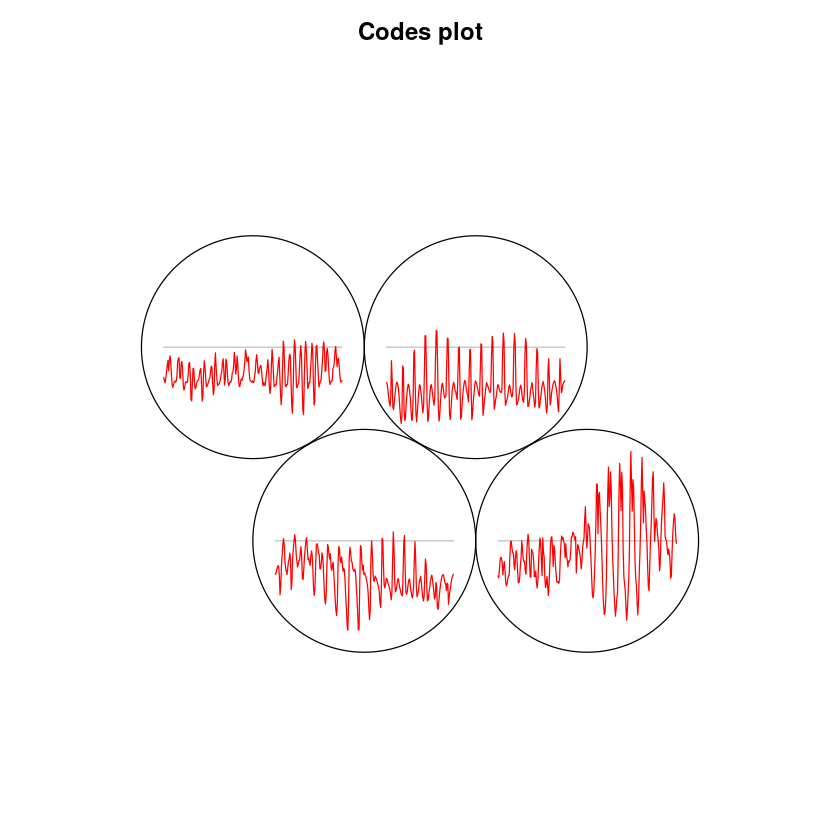

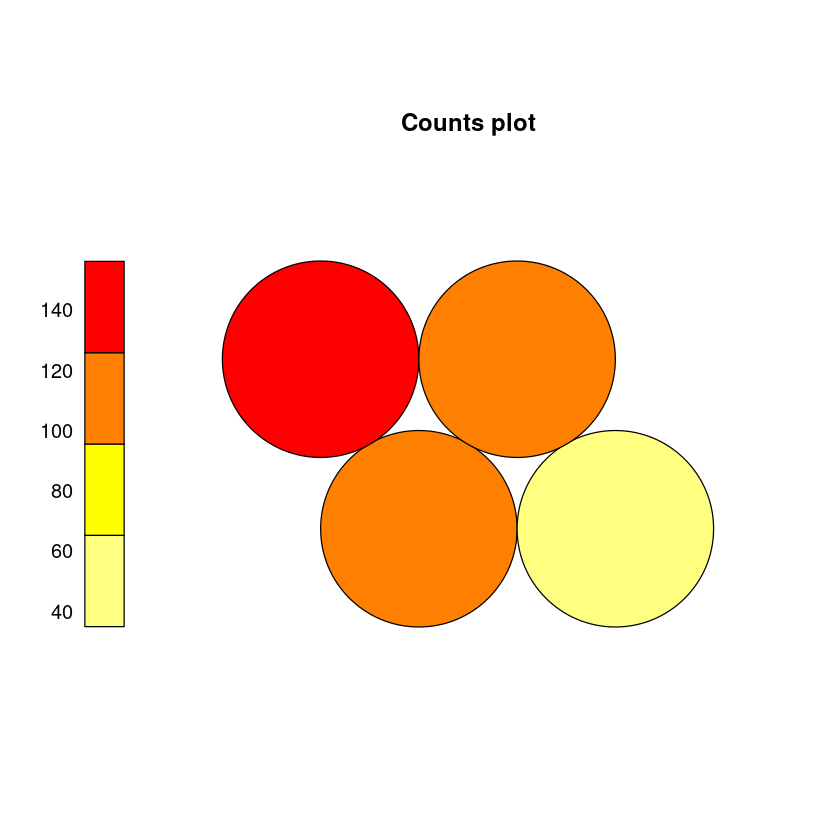

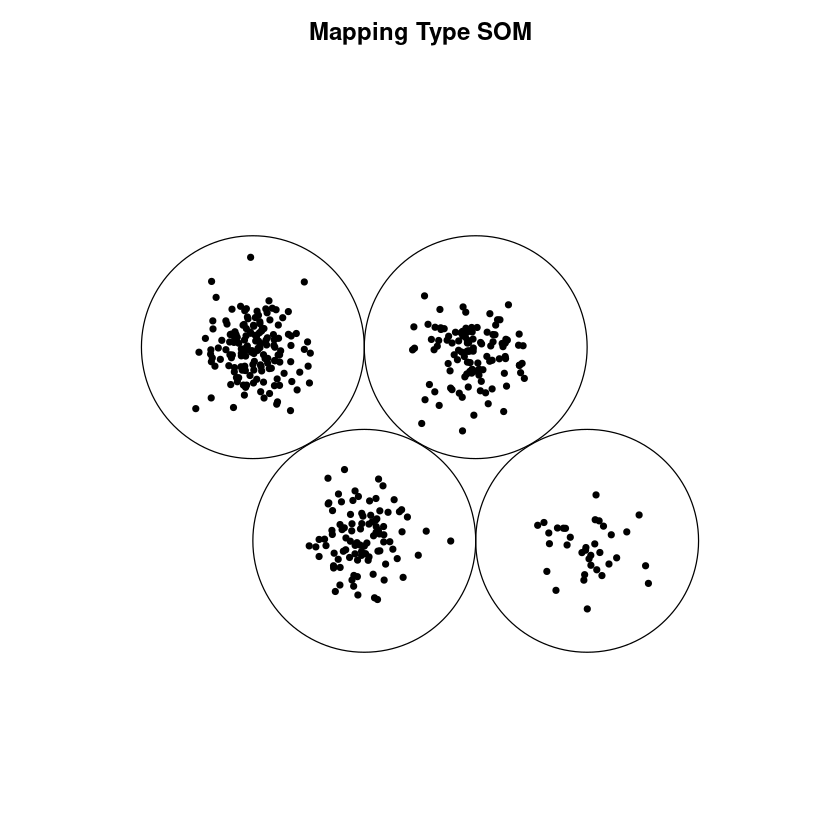

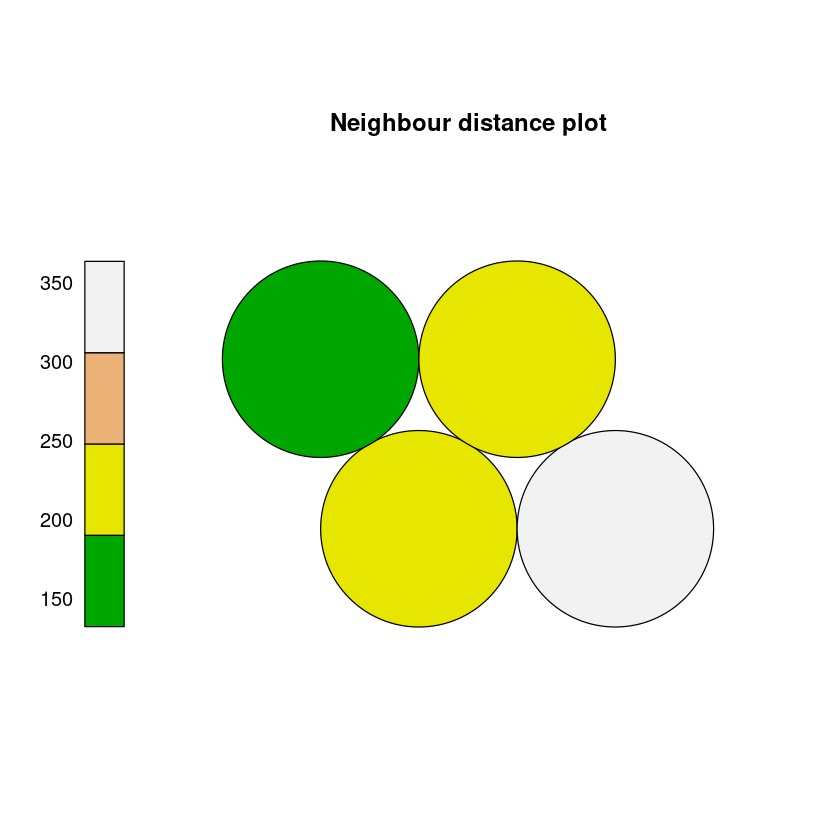

In [49]:
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

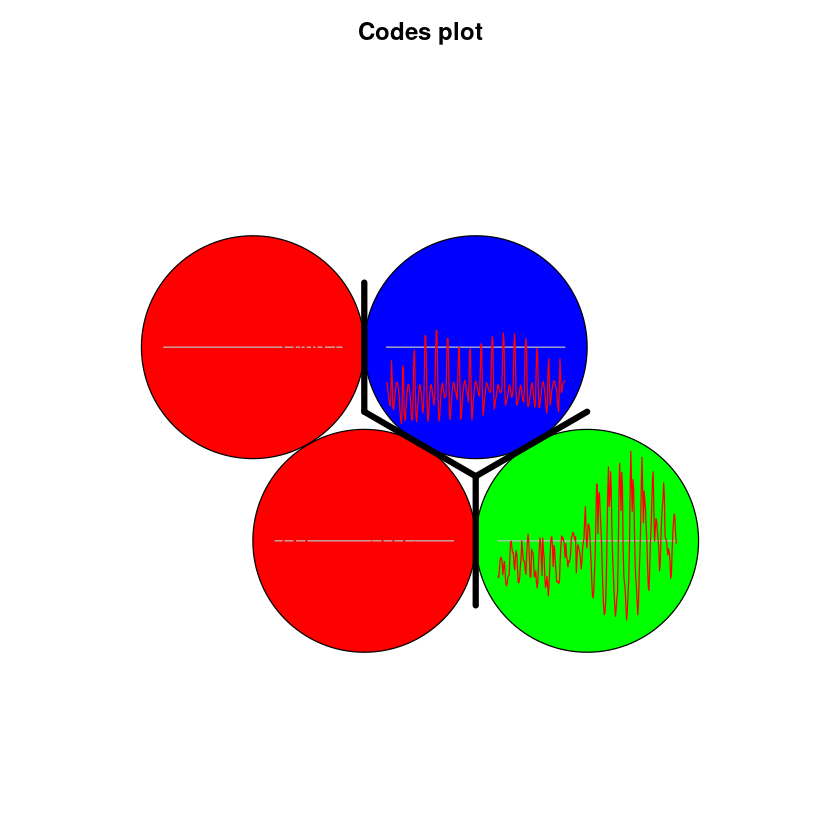

In [50]:
 mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)

In [81]:


clasificacion=sommap$unit.classif
clasificacion


[1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [38] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [75] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 2 2 2 3 2 2 1 2 2
[112] 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 1 2 3 3
[149] 3 3 2 3 2 3 3 3 3 2 2 3 3 3 3 3 2 2 3 2 2 3 3 3 2 3 2 2 3 2 2 3 3 3 3 3 3
[186] 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 3 1 4 1 1 1 1 4 1
[260] 1 1 1 4 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 3 2 2 3 2 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1
[334] 3 3 4 3 3 3 3 3 4 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 2 3 3 1 3 3 4
[371] 3 3 3 3 3 2 4 3 3 1 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 4 3

In [82]:
etiquetas

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
[223] 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
[260] 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
[297] 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
[334] 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
[371] 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8

In [88]:
ClusterPurity <- function(clusters, classes) { #Función para purity
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}

#calcular purity del clasificador kohonen en este ejercicio
print(ClusterPurity(etiquetas,clasificacion))


[1] 0.86


Kohonen posee un purity mas elevado que k-means
| k-means | Kohonen   |
|------|------|
|   0.3  | 0.86|

Como conclusion puedo decir que el mejor clasificador para este ejercicio es Mapas autogenerados (Kohonen) ya que la perdida es menor, de hecho el valor de purity que presenta (0.8) es bastante bueno